In [1]:
import arviz as az
import matplotlib.pylab as plt
import numpy as np
from scipy.special import erf
import sys
sys.path.append('./../figures/')
from makeCorner import *

First, load the output of our inference as an arviz InferenceData object:

In [2]:
data = az.from_netcdf("effective_spin_gaussian_spike_gwtc2.cdf")
az.summary(data)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bq,0.962,0.820,-0.420,2.532,0.013,0.011,4763.0,3607.0,1.0
logit_zeta_spike,-0.148,0.999,-2.015,1.571,0.017,0.014,4362.0,3267.0,1.0
logsig_chi,-0.896,0.172,-1.253,-0.596,0.003,0.002,3924.0,2317.0,1.0
min_log_neff,2.283,0.304,1.691,2.848,0.005,0.004,3948.0,2860.0,1.0
mu_chi,0.133,0.062,0.027,0.252,0.001,0.001,4413.0,4460.0,1.0
nEff_inj_per_event,130.028,50.888,52.247,228.039,0.711,0.504,5187.0,5900.0,1.0
zeta_spike,0.479,0.193,0.118,0.828,0.003,0.002,4362.0,3267.0,1.0


The contents of this file are the following:

| Parameter | Description |
| :-------- | :---------- |
| `mu_chi` | Mean of the $\chi_\mathrm{eff}$ distribution |
| `logsig_chi` | Log10 of the standard deviation of the $\chi_\mathrm{eff}$ distribution |
| `zeta_spike` | Mixture of BBHs in the delta-function at $\chi_\mathrm{eff}=0$ |
| `logit_zeta_spike` | Intermediate parameter; for efficiency, our code samples in $\mathrm{logit}(\zeta_\mathrm{spike})$ rather than $\zeta_\mathrm{spike}$ itself |
| `bq` | Power-law index on the conditional secondary mass distribution $p(m_2\|m_1)$|
| `min_log_neff` | Log10 of the minimum number of effective samples (taken across events) for the proposed hyperparameter |
| `nEff_inj_per_event` | The effective number of found injections per observed event at the proposed hyperparameter (should be $\gg 4$) |

Next, plot our various chains to inspect convergence:

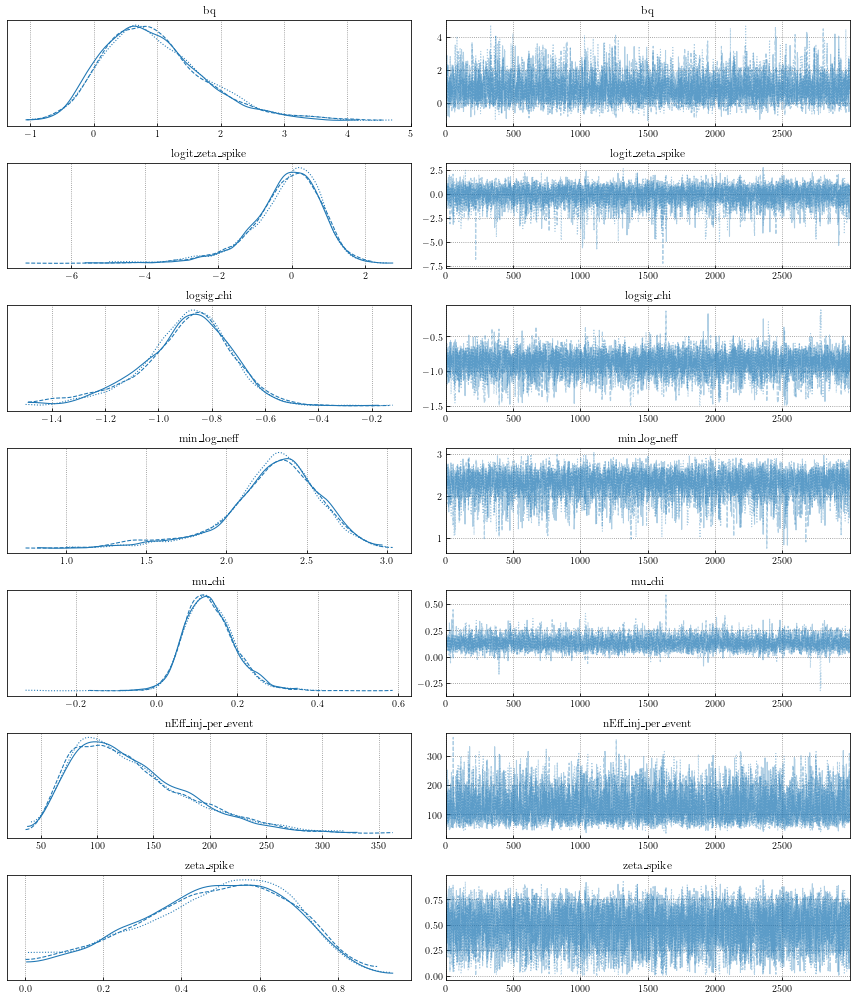

In [3]:
az.plot_trace(data, compact=True)
plt.tight_layout()
plt.show()

Let's make a corner plot showing posteriors on our parameters:

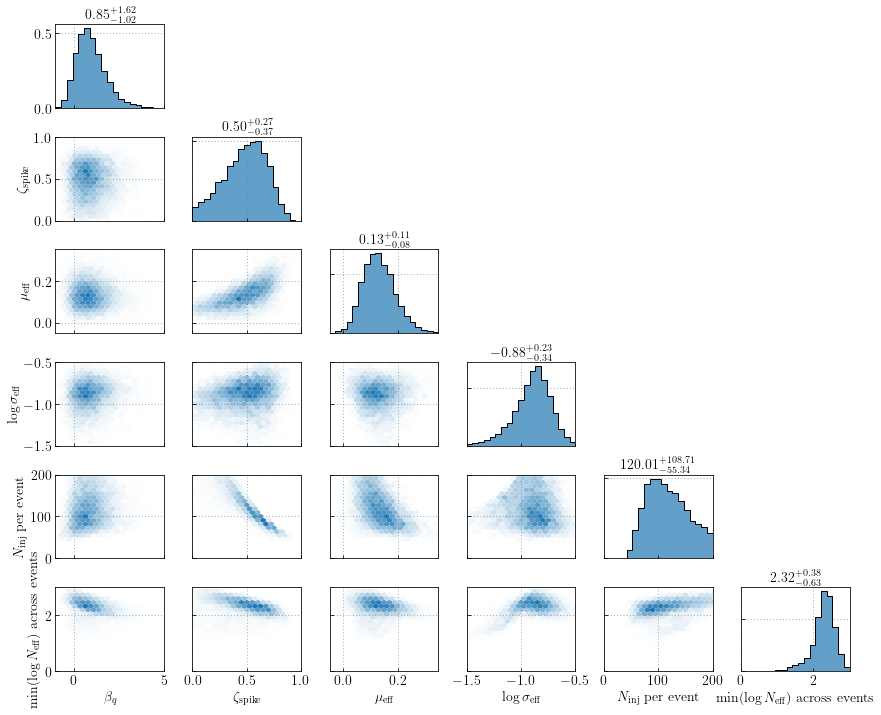

In [4]:
fig = plt.figure(figsize=(12,10))

stacked_samples = data.posterior.stack(draws=("chain", "draw"))
toPlot = {
    "bq":{"data":stacked_samples.bq,"plot_bounds":(-1,5),"label":r"$\beta_q$"},
    "zeta_spike":{"data":stacked_samples.zeta_spike,"plot_bounds":(0,1),"label":r"$\zeta_\mathrm{spike}$"},
    "mu_chi":{"data":stacked_samples.mu_chi,"plot_bounds":(-0.05,0.35),"label":r"$\mu_\mathrm{eff}$"},
    "logsig":{"data":stacked_samples.logsig_chi,"plot_bounds":(-1.5,-0.5),"label":r"$\log\sigma_\mathrm{eff}$"},
    "neff_inj_per_event":{"data":stacked_samples.nEff_inj_per_event,"plot_bounds":(0,200),"label":r"$N_\mathrm{inj}$ per event"},
    "min_log_neff":{"data":stacked_samples.min_log_neff,"plot_bounds":(0,3),"label":r"$\min(\log N_\mathrm{eff})$ across events"}
}

plot_corner(fig,toPlot,'#1f78b4')
plt.tight_layout()
plt.show()

Let's compare against the full GWTC-3 run:

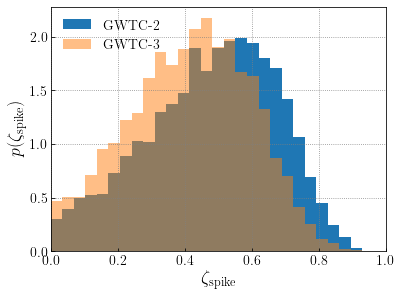

In [5]:
gwtc3_data = az.from_netcdf("effective_spin_gaussian_spike.cdf")
gwtc3_stacked_samples = gwtc3_data.posterior.stack(draws=("chain", "draw"))

fig,ax = plt.subplots()
ax.hist(stacked_samples.zeta_spike.values,bins=np.linspace(0,1,30),label='GWTC-2',density=True)
ax.hist(gwtc3_stacked_samples.zeta_spike.values,alpha=0.5,bins=np.linspace(0,1,30),label='GWTC-3',density=True)
ax.legend(loc='upper left')

ax.set_xlabel('$\zeta_\mathrm{spike}$')
ax.set_ylabel('$p(\zeta_\mathrm{spike})$')
ax.set_xlim(0,1)
plt.show()